## **CROP RECOMMENDATION MODEL USING SUPERVISED MACHINE LEARNING: CLASSSICATION**<br>


---
**Abstract**
<br><br>
The result show that Decision Tree (DT), Random Forest (RF), and Naive Bayes (NB) have similar and superior performance, with  accuracy (0.9964), precision (0.9966), recall (0.9964), and f1-score (0.9964). Therefore, the models demonstrated reliability for predicting crop recommendations using features such as Nitrogen, Phosphorous, Potassium, Temperature, Humidity, pH, and Rainfall.

In contrast, Support Vector Machine (SVM) and K-Nearest Neighbors (KN) have lower performance, especially SVM with accuracy only reaching 0.3527, suggesting that these models might not be suitable without any further tuning or data preprocessing manipulation. <br> <br>


**Context**<br>
Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.<br>
<br>
**Variables** <br>
1. N - ratio of Nitrogen content in soil
2. P - ratio of Phosphorous content in soil
3. K - ratio of Potassium content in soil
4. temperature - temperature in degree Celsius
5. humidity - relative humidity in %
6. ph - ph value of the soil
7. rainfall - rainfall in mm <br>

Datasets: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

# Dataset Preparation

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/00 Belajar Machine Learning/04 Crop Recommendation Kaggle/Crop_recommendation.csv')

In [217]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Data Preprocessing<br>

Data Cleaning

In [218]:
df.isna().sum() # Dataset is clean from NaN value

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


Exploratory Data Analysis (EDA)

In [219]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


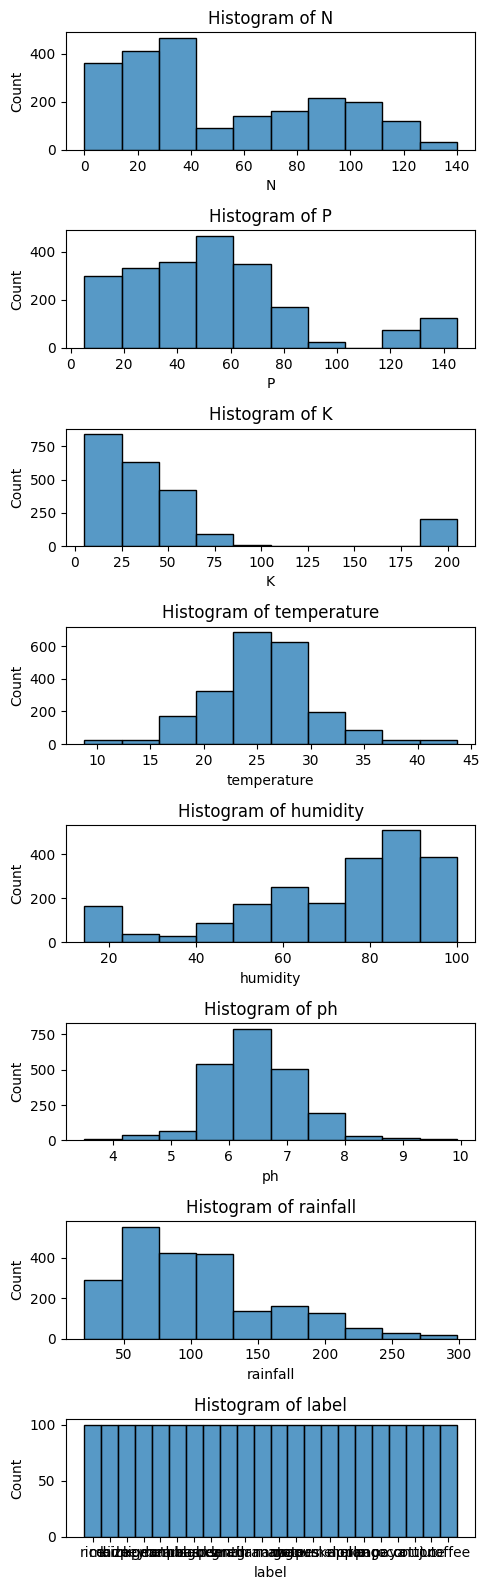

In [220]:
def plot_hist (df):
  num_features = len(df.columns)
  fig, axes = plt.subplots(nrows=num_features, figsize=(5, 2 * num_features))
  for i, column in enumerate(df.columns):
      sns.histplot(df[column], bins=10, ax=axes[i])
      axes[i].set_title(f"Histogram of {column}")

  plt.tight_layout()
  plt.show()

plot_hist(df)

Some of the data should be scalled using MinMax , StandardScaler, or Log. I recommend to scale this data:
1. N
2. P
3. K
4. humidity
5. rainfall

In [221]:
features_to_scale = ['N','P','K','humidity','rainfall']

In [222]:
from sklearn.preprocessing import StandardScaler
df_std = df.copy()
scaler = StandardScaler()
df_std[features_to_scale] = scaler.fit_transform(df_std[features_to_scale])

In [223]:
from sklearn.preprocessing import MinMaxScaler
df_minmax = df.copy()
scaler = MinMaxScaler()
df_minmax[features_to_scale] = scaler.fit_transform(df_minmax[features_to_scale])

In [224]:
df_log1p = df.copy()
df_log1p[features_to_scale] = df_log1p[features_to_scale].apply(lambda x: np.log1p(x))

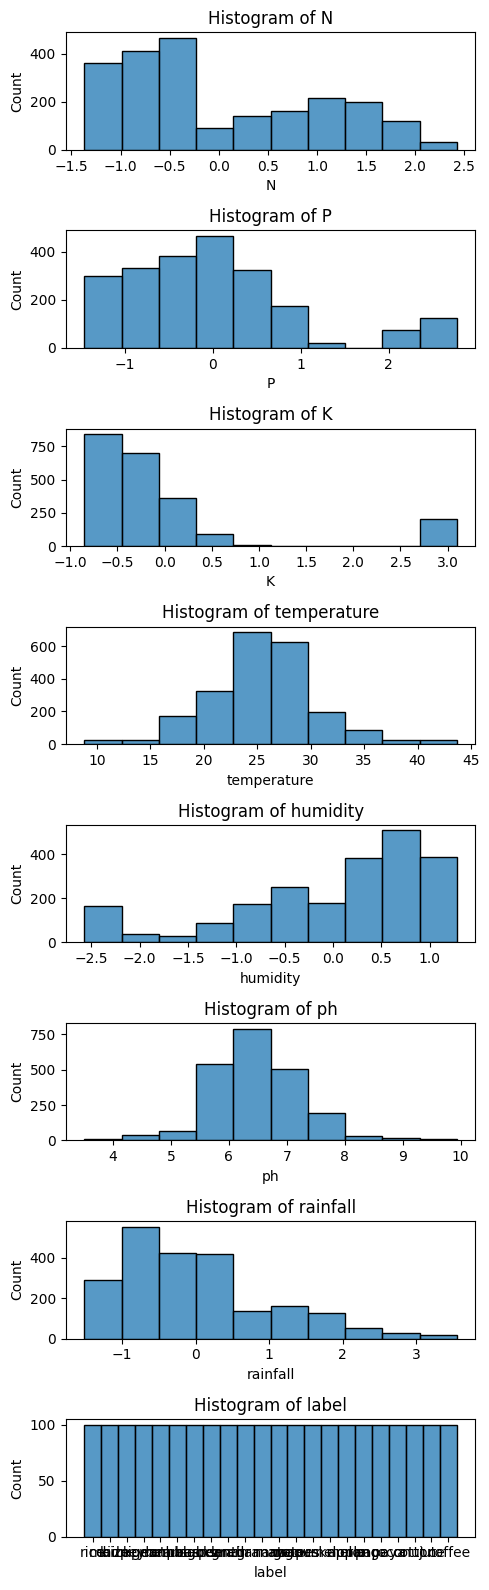

In [225]:
plot_hist(df_std)

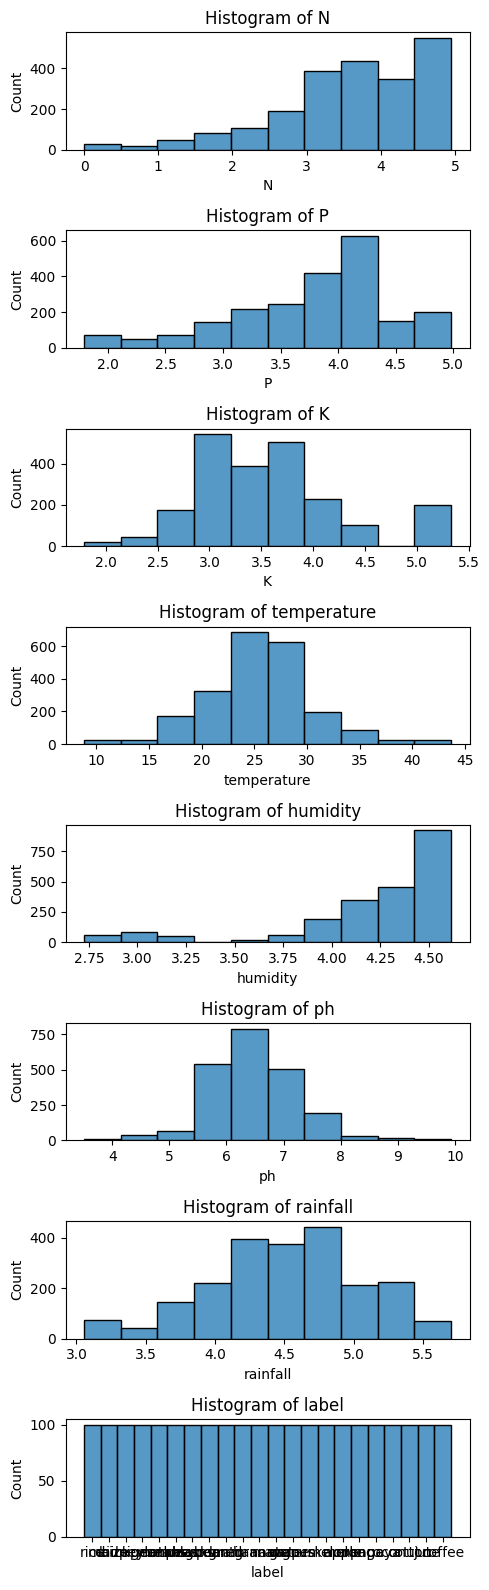

In [226]:
plot_hist(df_log1p)

Features & Target separation

In [227]:
# Features (x)
features_std = df_std.drop('label',axis=1)
features_minmax = df_minmax.drop('label',axis=1)
features_log1p = df_log1p.drop('label',axis=1)

# Target (y)
target = df['label']

# Model Algorithms<br>
Will be trial Using
1. Decision Tree
2. Random Forest
3. Support Vector Machine (SVM)
4. Naive Bayer
5. K-Neighbours

In [228]:
# Train Test Split
from sklearn.model_selection import train_test_split
# Import Model Modules
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.neighbors import KNeighborsClassifier as kn

In [245]:
model_dict = {
    'dt': dt,
    'rf': rf,
    'svc': SVC,
    'nb': nb,
    'kn': kn
}

def tts (features,target,ts,model_dict,name_model):
  x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=ts,random_state=0,stratify=target)
  model = model_dict[name_model]()
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  return y_pred, x_test, y_test

Decision Tree

In [251]:
testsize = 0.25 # 75% train 25% test

# Train set StandarScalling
model_function_std = tts(features_std,target,testsize,model_dict,'dt')
y_pred_std, x_test_std, y_test_std = model_function_std
# Train set MinMax Scalling
model_function_minmax = tts(features_minmax,target,testsize,model_dict,'dt')
y_pred_minmax, x_test_minmax, y_test_minmax = model_function_minmax
# Train set Log1p Scalling
model_function_log = tts(features_log1p,target,testsize,model_dict,'dt')
y_pred_log, x_test_log, y_test_log = model_function_log

# Model Evaluation
Using classification metrics
1. Confussion Matrix
2. Accuracy
3. Precision
4. Recall
5. F1-Score

In [275]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [278]:
std_acc = round(accuracy_score(y_test_std,y_pred_std),4)
minmax_acc = round(accuracy_score(y_test_minmax,y_pred_minmax),4)
log_acc = round(accuracy_score(y_test_log,y_pred_log),4)

In [279]:
std_acc = [std_acc,minmax_acc,log_acc]
pd.DataFrame(std_acc,index=['std','minmax','log1p'],columns=['accuracy'])

,accuracy
std,0.9945
minmax,0.9964
log1p,0.9945


In Decision Tree model, MinMax Scalling performs well in Decision Tree Models. I assume to keep using Min Max Scalling to compare all of the models.

Decision Tree

In [296]:
model_function_minmax = tts(features_minmax,target,testsize,model_dict,'dt')
y_pred_minmax_dt, x_test_minmax_dt, y_test_minmax_dt = model_function_minmax
dt_acc = round(accuracy_score(y_test_minmax_dt,y_pred_minmax_dt),4)
dt_prc = round(precision_score(y_test_minmax_dt,y_pred_minmax_dt,average='weighted'),4)
dt_rec = round(recall_score(y_test_minmax_dt,y_pred_minmax_dt,average='weighted'),4)
dt_f1 = round(f1_score(y_test_minmax_dt,y_pred_minmax_dt,average='weighted'),4)
metrics_dt = [dt_acc,dt_prc,dt_rec,dt_f1]

Random Forest

In [291]:
model_function_minmax = tts(features_minmax,target,testsize,model_dict,'rf')
y_pred_minmax_rf, x_test_minmax_rf, y_test_minmax_rf = model_function_minmax
rf_acc = round(accuracy_score(y_test_minmax_rf,y_pred_minmax_rf),4)
rf_prc = round(precision_score(y_test_minmax_rf,y_pred_minmax_rf,average='weighted'),4)
rf_rec = round(recall_score(y_test_minmax_rf,y_pred_minmax_rf,average='weighted'),4)
rf_f1 = round(f1_score(y_test_minmax_rf,y_pred_minmax_rf,average='weighted'),4)
metrics_rf = [rf_acc,rf_prc,rf_rec,rf_f1]

Support Vector Machine

In [292]:
model_function_minmax = tts(features_minmax,target,testsize,model_dict,'svc')
y_pred_minmax_svc, x_test_minmax_svc, y_test_minmax_svc = model_function_minmax
svc_acc = round(accuracy_score(y_test_minmax_svc,y_pred_minmax_svc),4)
svc_prc = round(precision_score(y_test_minmax_svc,y_pred_minmax_svc,average='weighted'),4)
svc_rec = round(recall_score(y_test_minmax_svc,y_pred_minmax_svc,average='weighted'),4)
svc_f1 = round(f1_score(y_test_minmax_svc,y_pred_minmax_svc,average='weighted'),4)
metrics_svc = [svc_acc,svc_prc,svc_rec,svc_f1]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naive Bayes

In [293]:
model_function_minmax = tts(features_minmax,target,testsize,model_dict,'nb')
y_pred_minmax_nb, x_test_minmax_nb, y_test_minmax_nb = model_function_minmax
nb_acc = round(accuracy_score(y_test_minmax_nb,y_pred_minmax_nb),4)
nb_prc = round(precision_score(y_test_minmax_nb,y_pred_minmax_nb,average='weighted'),4)
nb_rec = round(recall_score(y_test_minmax_nb,y_pred_minmax_nb,average='weighted'),4)
nb_f1 = round(f1_score(y_test_minmax_nb,y_pred_minmax_nb,average='weighted'),4)
metrics_nb = [nb_acc,nb_prc,nb_rec,nb_f1]

K-Neighbours

In [294]:
model_function_minmax = tts(features_minmax,target,testsize,model_dict,'kn')
y_pred_minmax_kn, x_test_minmax_kn, y_test_minmax_kn = model_function_minmax
kn_acc = round(accuracy_score(y_test_minmax_kn,y_pred_minmax_kn),4)
kn_prc = round(precision_score(y_test_minmax_kn,y_pred_minmax_kn,average='weighted'),4)
kn_rec = round(recall_score(y_test_minmax_kn,y_pred_minmax_kn,average='weighted'),4)
kn_f1 = round(f1_score(y_test_minmax_kn,y_pred_minmax_kn,average='weighted'),4)
metrics_kn = [kn_acc,kn_prc,kn_rec,kn_f1]

Comparison

In [298]:
compare = pd.DataFrame([metrics_dt, metrics_rf,metrics_svc,metrics_nb,metrics_kn],index=['Decision Tree','Random Forest','SVM','Naive Bayer','K-Neighbours'],columns=['accuracy','precision','recall','f1-score'])
compare

,accuracy,precision,recall,f1-score
Decision Tree,0.9964,0.9966,0.9964,0.9964
Random Forest,0.9964,0.9966,0.9964,0.9964
SVM,0.3527,0.2906,0.3527,0.2657
Naive Bayer,0.9964,0.9966,0.9964,0.9964
K-Neighbours,0.7927,0.8150,0.7927,0.7834
